In [1]:
import pandas as pd
from pandas.plotting import autocorrelation_plot, lag_plot
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AR

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temperatures, dtype: float64


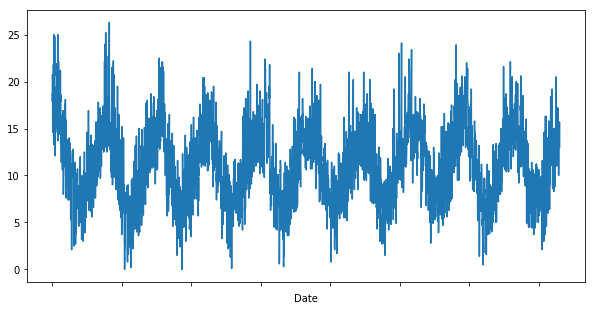

In [2]:
series = pd.read_csv('temps.csv', header=0)
series = series.set_index("Date")
series = series.astype(float)["Temperatures"]
print(series.head())
series.plot(figsize=(10,5))
plt.show()

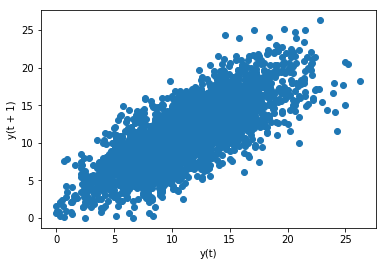

In [3]:
lag_plot(series)
plt.show()

In [4]:
values = pd.DataFrame(series.values)
df = pd.concat([values.shift(1),values], axis=1)
df.columns = ['t-1', 't+1']
result = df.corr()
print(result)

         t-1      t+1
t-1  1.00000  0.77487
t+1  0.77487  1.00000


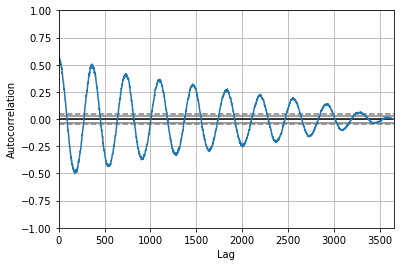

In [5]:
autocorrelation_plot(series)
plt.show()

Test MSE: 3.423


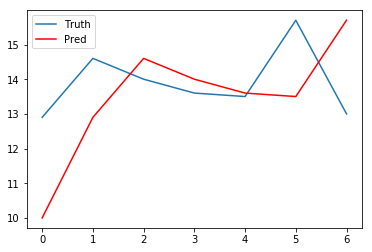

In [6]:
df = pd.concat([values.shift(1), values], axis=1)
df.columns = ['t-1', 't']
# split into train and test sets
X = df.values
train, test = X[1:len(X)-7], X[len(X)-7:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

# persistence model
def model_persistence(x):
    return x

# walk-forward validation
predictions = []
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print("Test MSE: {:.3f}".format(test_score))
plt.plot(test_y, label="Truth")
plt.plot(predictions, color='red', label="Pred")
plt.legend()
plt.show()

In [9]:
train.shape

(3642, 2)

Lag: 29
predicted=14.207771963483093, expected=12.9
predicted=14.355563097885994, expected=14.6
predicted=14.145536481990653, expected=14.0
predicted=14.154498020568248, expected=13.6
predicted=13.79611674068997, expected=13.5
predicted=13.675334528543445, expected=15.7
predicted=13.716942832702598, expected=13.0
Test MSE: 0.971


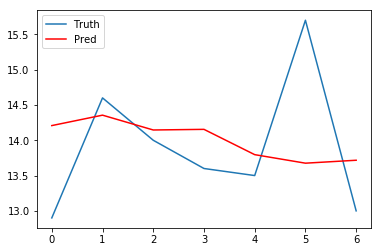

In [16]:
# train autoregression
model = AR(train_X)
model_fit = model.fit()
print('Lag: {}'.format(model_fit.k_ar))
# print('Coefficients: {}'.format(model_fit.params))
# make predictions
predictions = model_fit.predict(start=len(train),end=len(train)+len(test)-1,
                               dynamic=False)
for i in range(len(predictions)):
    print('predicted={}, expected={}'.format(predictions[i], test_y[i]))
    pass
error = mean_squared_error(test_y, predictions)
print('Test MSE: {:.3f}'.format(error))
# plot results
plt.plot(test_y, label="Truth")
plt.plot(predictions, color='red', label="Pred")
plt.legend()
plt.show()